## Travelling Salesman Problem (TSP)

The **Travelling Salesman Problem (TSP)** is a classic combinatorial optimization problem where the goal is to find the shortest possible route that visits each city exactly once and returns to the starting city.

### Definition:
Given:
- A set of \( n \) cities, represented as nodes in a graph \( G = (V, E) \),
- A distance (or weight) \( d_{uv} \) between each pair of cities \( u \) and \( v \),

The objective is to determine the order of visiting the cities such that:
1. Each city is visited exactly once,
2. The total travel distance is minimized,
3. The tour ends at the starting city.


The TSP is **NP-hard**, meaning that solving it exactly for a large number of cities is computationally infeasible. Heuristic and approximation algorithms (e.g., genetic algorithms, simulated annealing, quantum optimization methods) are often used to find near-optimal solutions efficiently.

## References
[1] Solve utility-scale quantum optimization problems:  
[qiskit QAOA](https://learning.quantum.ibm.com/tutorial/quantum-approximate-optimization-algorithm)

## Small distance TSP

array([[0, 5, 7, 8],
       [5, 0, 7, 8],
       [7, 7, 0, 4],
       [8, 8, 4, 0]])

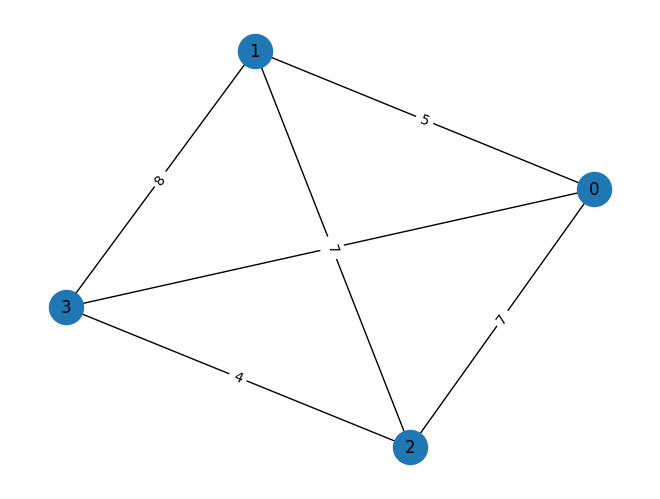

In [1]:
from TSP.tsp import Tsp, bruteforce

tsp = Tsp(4, 1) 
tsp.weight_matrix

## Encode to QUBO

### Amplify QUBO

In [2]:
qubo = tsp.qubo(solver="Amplify", penalty=15)
qubo['model'].to_unconstrained_poly()
# qubo["obj"] 

Poly(30 q_{0,0} q_{0,1} + 30 q_{0,0} q_{0,2} + 30 q_{0,0} q_{0,3} + 30 q_{0,0} q_{1,0} + 5 q_{0,0} q_{1,1} + 5 q_{0,0} q_{1,3} + 30 q_{0,0} q_{2,0} + 7 q_{0,0} q_{2,1} + 7 q_{0,0} q_{2,3} + 30 q_{0,0} q_{3,0} + 8 q_{0,0} q_{3,1} + 8 q_{0,0} q_{3,3} + 30 q_{0,1} q_{0,2} + 30 q_{0,1} q_{0,3} + 5 q_{0,1} q_{1,0} + 30 q_{0,1} q_{1,1} + 5 q_{0,1} q_{1,2} + 7 q_{0,1} q_{2,0} + 30 q_{0,1} q_{2,1} + 7 q_{0,1} q_{2,2} + 8 q_{0,1} q_{3,0} + 30 q_{0,1} q_{3,1} + 8 q_{0,1} q_{3,2} + 30 q_{0,2} q_{0,3} + 5 q_{0,2} q_{1,1} + 30 q_{0,2} q_{1,2} + 5 q_{0,2} q_{1,3} + 7 q_{0,2} q_{2,1} + 30 q_{0,2} q_{2,2} + 7 q_{0,2} q_{2,3} + 8 q_{0,2} q_{3,1} + 30 q_{0,2} q_{3,2} + 8 q_{0,2} q_{3,3} + 5 q_{0,3} q_{1,0} + 5 q_{0,3} q_{1,2} + 30 q_{0,3} q_{1,3} + 7 q_{0,3} q_{2,0} + 7 q_{0,3} q_{2,2} + 30 q_{0,3} q_{2,3} + 8 q_{0,3} q_{3,0} + 8 q_{0,3} q_{3,2} + 30 q_{0,3} q_{3,3} + 30 q_{1,0} q_{1,1} + 30 q_{1,0} q_{1,2} + 30 q_{1,0} q_{1,3} + 30 q_{1,0} q_{2,0} + 7 q_{1,0} q_{2,1} + 7 q_{1,0} q_{2,3} + 30 q_{1,0} q_

### Qiskit QUBO

In [3]:
qubo = tsp.qubo("Qiskit", penalty=17)
# cost_hamiltonian, offset = qubo['model'], qubo['offset']

# print(cost_hamiltonian, f"{offset=}", sep='\n')
from utils.utils import formula_to_latex

display(formula_to_latex(str(qubo["qubo"])))

cost_hamiltonian, offset = qubo['model'], qubo['offset']



<IPython.core.display.Math object>

In [4]:
print(cost_hamiltonian)

SparsePauliOp(['IIIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIIZI', 'IIIIIIIIIIIIIZII', 'IIIIIIIIIIIIZIII', 'IIIIIIIIIIIZIIII', 'IIIIIIIIIIZIIIII', 'IIIIIIIIIZIIIIII', 'IIIIIIIIZIIIIIII', 'IIIIIIIZIIIIIIII', 'IIIIIIZIIIIIIIII', 'IIIIIZIIIIIIIIII', 'IIIIZIIIIIIIIIII', 'IIIZIIIIIIIIIIII', 'IIZIIIIIIIIIIIII', 'IZIIIIIIIIIIIIII', 'ZIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIZZ', 'IIIIIIIIIIIIIZIZ', 'IIIIIIIIIIIIZIIZ', 'IIIIIIIIIIIZIIIZ', 'IIIIIIIIIIZIIIIZ', 'IIIIIIIZIIIIIIIZ', 'IIIIIIZIIIIIIIIZ', 'IIIZIIIIIIIIIIIZ', 'IIZIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIZZI', 'IIIIIIIIIIIIZIZI', 'IIIIIIIIIIIZIIZI', 'IIIIIIIIIIZIIIZI', 'IIIIIIIIIZIIIIZI', 'IIIIIIIZIIIIIIZI', 'IIIIIIZIIIIIIIZI', 'IIIIIZIIIIIIIIZI', 'IIIZIIIIIIIIIIZI', 'IIZIIIIIIIIIIIZI', 'IZIIIIIIIIIIIIZI', 'IIIIIIIIIIIIZZII', 'IIIIIIIIIIZIIZII', 'IIIIIIIIIZIIIZII', 'IIIIIIIIZIIIIZII', 'IIIIIIZIIIIIIZII', 'IIIIIZIIIIIIIZII', 'IIIIZIIIIIIIIZII', 'IIZIIIIIIIIIIZII', 'IZIIIIIIIIIIIZII', 'ZIIIIIIIIIIIIZII', 'IIIIIIIIIZIIZIII', 'IIIIIIIIZIIIZIII', 'IIIIIZIIIIIIZIII', 'IIII

## Bruteforce

In [5]:
bruteforce(tsp.weight_matrix)

(np.int64(24), (0, 1, 2, 3), 0.0)

## Solve locally

ParameterView([ParameterVectorElement(β[0]), ParameterVectorElement(β[1]), ParameterVectorElement(β[2]), ParameterVectorElement(β[3]), ParameterVectorElement(β[4]), ParameterVectorElement(β[5]), ParameterVectorElement(β[6]), ParameterVectorElement(β[7]), ParameterVectorElement(β[8]), ParameterVectorElement(β[9]), ParameterVectorElement(β[10]), ParameterVectorElement(β[11]), ParameterVectorElement(β[12]), ParameterVectorElement(β[13]), ParameterVectorElement(β[14]), ParameterVectorElement(β[15]), ParameterVectorElement(β[16]), ParameterVectorElement(β[17]), ParameterVectorElement(β[18]), ParameterVectorElement(β[19]), ParameterVectorElement(β[20]), ParameterVectorElement(β[21]), ParameterVectorElement(β[22]), ParameterVectorElement(β[23]), ParameterVectorElement(β[24]), ParameterVectorElement(β[25]), ParameterVectorElement(β[26]), ParameterVectorElement(β[27]), ParameterVectorElement(β[28]), ParameterVectorElement(β[29]), ParameterVectorElement(β[30]), ParameterVectorElement(β[31]), Par

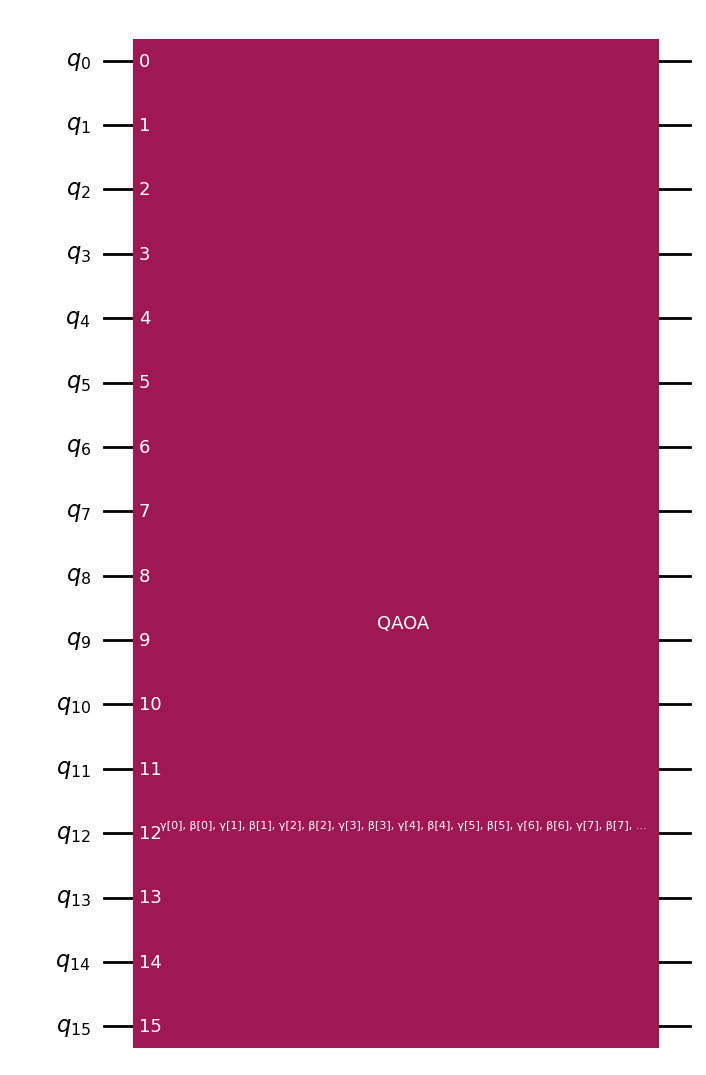

In [6]:
from qiskit.circuit.library import QAOAAnsatz

reps = 100
circuit = QAOAAnsatz(cost_operator=cost_hamiltonian, reps=reps)
print(circuit.parameters)

circuit.draw('mpl')

## Optimize Circuit

 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: -122.45201372244183
       x: [ 4.629e+00  1.584e+00 ...  3.148e+00  1.562e+00]
    nfev: 1000
   maxcv: 0.0


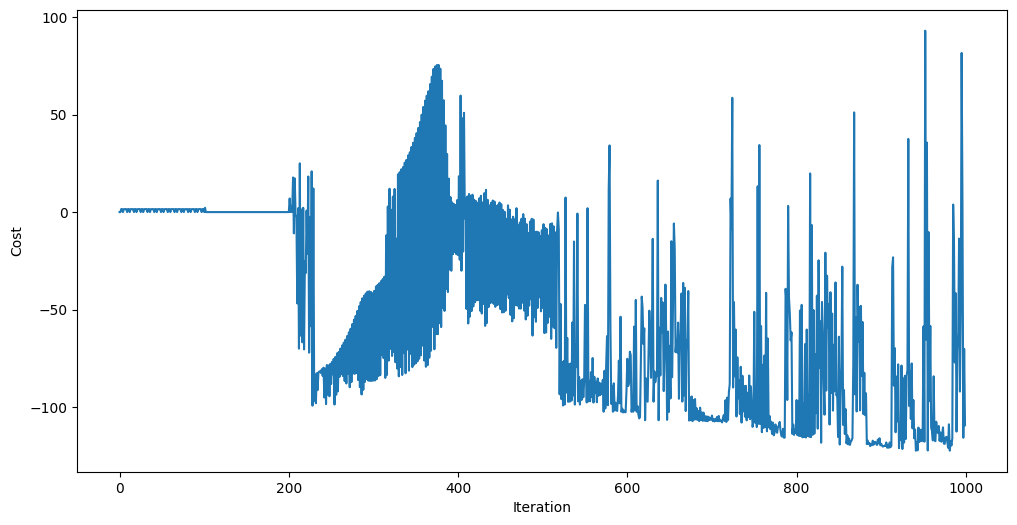

-122.45201372244183


In [7]:
from utils import QAOA
from scipy.optimize import minimize
from qiskit.primitives import StatevectorEstimator as Estimator
from utils.utils import validate_bounds

qaoa = QAOA(circuit, reps=reps)

estimator = Estimator()

bounds = validate_bounds(circuit)

result = minimize(
    qaoa.cost_func_estimator,
    qaoa.init_params,
    args=(cost_hamiltonian, estimator),
    method="COBYLA",
    bounds=bounds
)

print(result)
cost = qaoa.draw_cost_function()
print(cost)

In [8]:
optimized_circuit = circuit.assign_parameters(result.x)
optimized_circuit.measure_all()
# optimized_circuit.draw('mpl', fold=False, idle_wires=False)

## Run sampling

In [9]:
from qiskit.primitives import StatevectorSampler as Sampler

sampler = Sampler(default_shots=10000)

pub= (optimized_circuit, )
job = sampler.run([pub], shots=int(1e4))
result = job.result()

most_likely_bitstring = tsp.interpret(result, "Qiskit", True)
print("Result bitstring:", most_likely_bitstring)

distribution: 
 {9520: 0.0003, 25244: 0.0001, 60290: 0.0001, 65096: 0.0001, 29568: 0.0002, 13371: 0.0001, 37663: 0.0001, 7185: 0.0002, 19973: 0.0003, 63328: 0.0001, 58384: 0.0003, 43538: 0.0001, 51968: 0.0002, 63256: 0.0002, 24720: 0.0003, 51876: 0.0002, 8213: 0.0002, 14080: 0.0001, 52264: 0.0002, 43314: 0.0003, 63114: 0.0001, 9009: 0.0001, 25861: 0.0001, 42246: 0.0001, 52354: 0.0002, 10653: 0.0001, 46184: 0.0001, 1124: 0.0001, 136: 0.0001, 19217: 0.0001, 58940: 0.0001, 64277: 0.0001, 25209: 0.0001, 52033: 0.0001, 11809: 0.0001, 2884: 0.0001, 56680: 0.0001, 21154: 0.0006, 8208: 0.0004, 17228: 0.0002, 29201: 0.0002, 63302: 0.0001, 25436: 0.0001, 7058: 0.0001, 13602: 0.0004, 23482: 0.0001, 3342: 0.0002, 53430: 0.0001, 12066: 0.0006, 37476: 0.0004, 46672: 0.0002, 9329: 0.0001, 30913: 0.0001, 37442: 0.0002, 29107: 0.0001, 60445: 0.0002, 28398: 0.0001, 6177: 0.0003, 21135: 0.0001, 63174: 0.0001, 35333: 0.0001, 33482: 0.0001, 10032: 0.0002, 41077: 0.0001, 1632: 0.0005, 2048: 0.0012, 7268: 0.

bitstring: [0. 0. 0. 0.], probability: 0.0049
bitstring: [1. 3. 3. 0.], probability: 0.0021
bitstring: [0. 2. 0. 0.], probability: 0.002
bitstring: [0. 2. 0. 0.], probability: 0.0018
bitstring: [0. 2. 0. 2.], probability: 0.0017
bitstring: [3. 1. 0. 2.], probability: 0.0017
bitstring: [0. 3. 0. 3.], probability: 0.0016
bitstring: [2. 0. 2. 0.], probability: 0.0015
bitstring: [3. 3. 0. 0.], probability: 0.0014
bitstring: [0. 0. 2. 0.], probability: 0.0014
bitstring: [2. 0. 1. 3.], probability: 0.0014
bitstring: [0. 0. 1. 3.], probability: 0.0014
bitstring: [0. 0. 3. 1.], probability: 0.0014
bitstring: [0. 2. 0. 0.], probability: 0.0013
bitstring: [0. 0. 0. 3.], probability: 0.0013
bitstring: [2. 0. 0. 0.], probability: 0.0013
bitstring: [0. 0. 0. 2.], probability: 0.0012
bitstring: [0. 3. 3. 1.], probability: 0.0012
bitstring: [0. 0. 2. 0.], probability: 0.0012
bitstring: [3. 2. 3. 0.], probability: 0.0012
bitstring: [0. 3. 2. 3.], probability: 0.0012
bitstring: [3. 0. 3. 0.], probabili

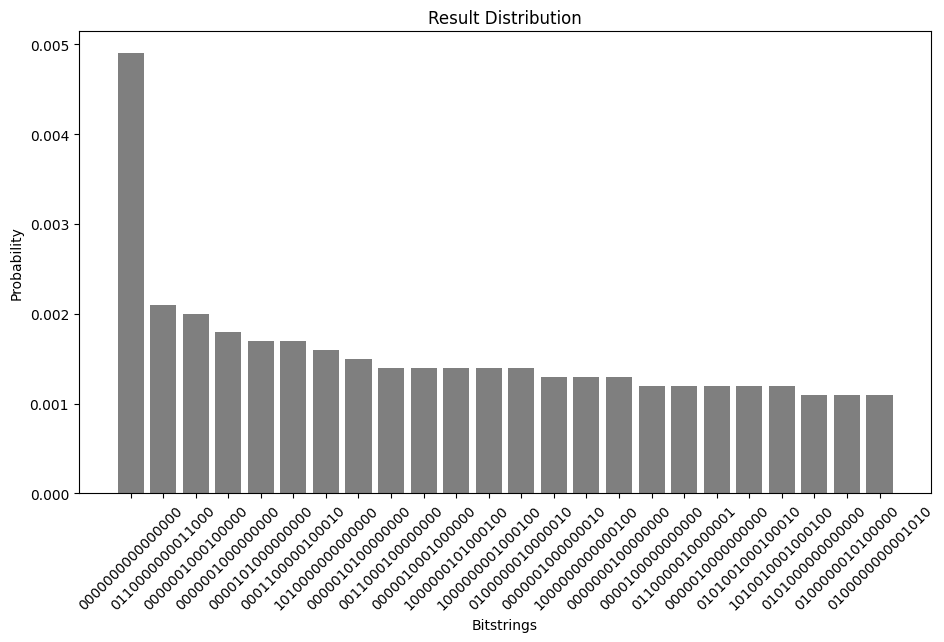

In [10]:
tsp.plot_distribution(24)

In [12]:
cost = 0
most_likely_bitstring = [3,1,0,2]
for a, b in zip(most_likely_bitstring, list(most_likely_bitstring)[1:] + [most_likely_bitstring[0]]):
   cost += tsp.weight_matrix[int(a)][int(b)]
print("Cost:", cost)

Cost: 24
